In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [141]:
datos = pd.read_csv('C:/Users/JCfor/Desktop/Proyecto Tesis I/DatasetFinal.csv')
##Variable valor de traspaso
valor = datos['Valor de traspaso'].str.split('-',expand = True)
valor.columns = ['MenorV', 'V_traspaso']
datos = pd.concat( [ datos,valor.V_traspaso ] , axis= 1)

##Variable Sueldo
datos['Sueldo'] = datos['Sueldo'].str.extract('(\d+)', expand=False).astype(float)
datos['Sueldo'] = datos['Sueldo']*1000
datos.head()

datos = datos.drop( ['Inf', 'Source.Name', 'Rec', 'Nombre', 'Club', 'División', 'Posición', 'Edad', 'Sueldo', 'V_traspaso','Valor de traspaso' ], axis=1)
#datos.describe().columns
#datos.to_excel('data.xlsx')

In [142]:
#datos['Valoracion'].replace(' ',np.nan, inplace = True)
#datos.dropna(subset=['Valoracion'], inplace = True)
#datos.info()

In [143]:
x_Autor = np.asanyarray(datos.drop(columns=['Valoracion']))
#y = np.asanyarray(datos[['Valoracion']])
y_Autor=datos['Valoracion']
#x = StandardScaler().fit_transform(x)

print(x_Autor.shape)
print(y_Autor.shape)

(3191, 47)
(3191,)


In [144]:
#https://medium.com/analytics-vidhya/what-is-random-state-in-machine-learning-84c1c9dffaad
x_trainAutor, x_testAutor, y_trainAutor, y_testAutor = train_test_split(x_Autor,y_Autor,test_size=0.2, random_state=3)
x_trainAutor, x_valAutor, y_trainAutor, y_valAutor = train_test_split(x_trainAutor, y_trainAutor, 
                                                                test_size=0.25, random_state=3)

In [145]:
#x_train = preprocessing.normalize(x_train)
#x_test = preprocessing.normalize(x_test)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler()
x_trainAutor = scaler.fit_transform(x_trainAutor)
x_testAutor = scaler.fit_transform(x_testAutor)

In [146]:
modelo_autor = keras.Sequential([
    keras.layers.Dense(6, activation='sigmoid', input_shape=(47,)),
    keras.layers.Dense(1)
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.1,
momentum=0.5)

modelo_autor.compile(optimizer = sgd,
               loss='mse',
               metrics=['mae'])

In [147]:
#https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
history_autor = modelo_autor.fit(x_trainAutor, y_trainAutor, epochs= 300, batch_size= 32,
                                            validation_data= (x_testAutor, y_testAutor))

Epoch 1/300
60/60 [==============================] - 1s 4ms/step - loss: 113.7005 - mae: 6.8721 - val_loss: 47.0313 - val_mae: 5.2591
Epoch 2/300
60/60 [==============================] - 0s 2ms/step - loss: 42.4055 - mae: 4.9523 - val_loss: 40.2718 - val_mae: 4.7554
Epoch 3/300
60/60 [==============================] - 0s 2ms/step - loss: 40.1341 - mae: 4.8268 - val_loss: 42.3456 - val_mae: 5.0719
Epoch 4/300
60/60 [==============================] - 0s 2ms/step - loss: 38.0412 - mae: 4.7699 - val_loss: 41.8697 - val_mae: 4.9444
Epoch 5/300
60/60 [==============================] - 0s 2ms/step - loss: 36.9423 - mae: 4.6735 - val_loss: 41.1713 - val_mae: 4.8731
Epoch 6/300
60/60 [==============================] - 0s 2ms/step - loss: 35.1527 - mae: 4.5228 - val_loss: 44.9824 - val_mae: 5.0810
Epoch 7/300
60/60 [==============================] - 0s 2ms/step - loss: 34.0079 - mae: 4.4913 - val_loss: 40.8206 - val_mae: 4.7644
Epoch 8/300
60/60 [==============================] - 0s 2ms/step - l

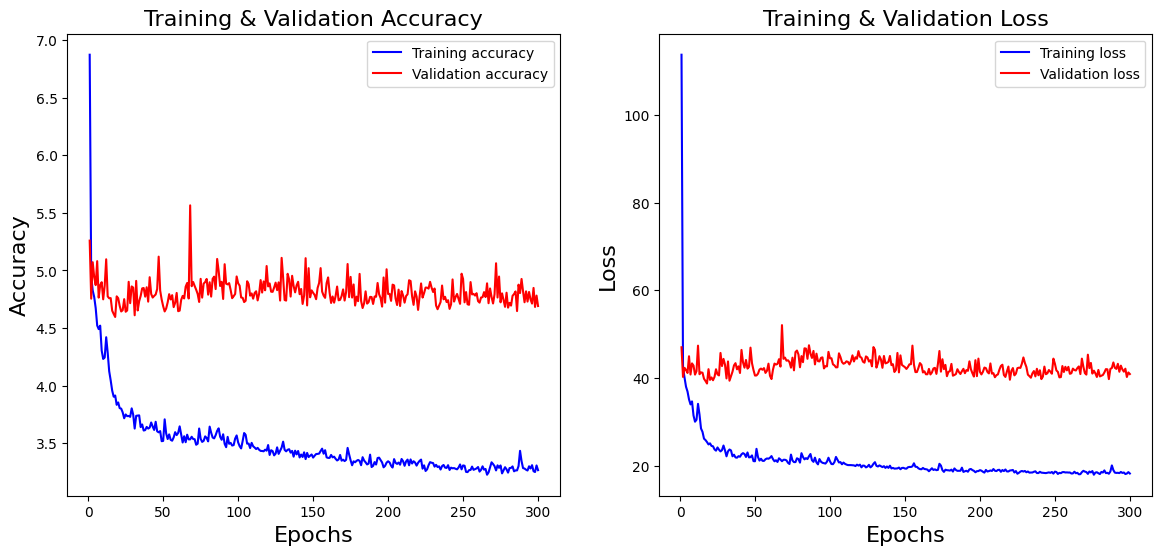

In [148]:
import matplotlib.pyplot as plt
 
history_dict2 = history_autor.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
accuracy2 = history_dict2['mae']
val_accuracy2 = history_dict2['val_mae']
 
epochs2 = range(1, len(loss_values2) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs2, accuracy2, 'b', label='Training accuracy')
ax[0].plot(epochs2, val_accuracy2, 'r', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs2, loss_values2, 'b', label='Training loss')
ax[1].plot(epochs2, val_loss_values2, 'r', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [149]:
from sklearn.metrics import r2_score
y_train_pred = modelo_autor.predict(x_trainAutor)
y_test_pred = modelo_autor.predict(x_testAutor)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_trainAutor, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_testAutor, y_test_pred)))

20/20 [==============================] - 0s 803us/step
The R2 score on the Train set is:	0.950
The R2 score on the Test set is:	0.886
